
{'pstring': '014/14/2/3', 'transimpedance': 727.2621911621392, 'Vpp': 0.004927079615255271, 'Ref_Vpp': 0.0, 'output_impedance': 291.38209297866723, 'current_bias': 0.8785819282317335}


'pstring' Pathstrings: '014/14/1/1' record name
 
'transimpedance': 738.6014767733689, slope (= dV/dI) 

'Vpp': 0.004890991306172068 high of function(max to zero)




In [2]:
import pickle as pkl



def getDict(file):
    with open(file,'rb') as f:
        SQUID_dict = pkl.load(f)
        #print(type(SQUID_dict.keys()))
    return SQUID_dict

file_20230911_222403 = '20230911_222403_SQUIDParams.pkl'
file_20230919_212918 = '20230919_212918_SQUIDParams.pkl'
file_20230919_221550 = '20230919_221550_SQUIDParams.pkl'
file_20230919_234736 = '20230919_234736_SQUIDParams.pkl'
file_20230920_014329 = '20230920_014329_SQUIDParams.pkl'
file_20230920_031303 = '20230920_031303_SQUIDParams.pkl'

dict_20230911_222403 = getDict(file_20230911_222403)
dict_20230919_212918 = getDict(file_20230919_212918)
dict_20230919_221550 = getDict(file_20230919_221550)
dict_20230919_234736 = getDict(file_20230919_234736)
dict_20230920_014329 = getDict(file_20230920_014329)
dict_20230920_031303 = getDict(file_20230920_031303)



In [3]:
# get all same exictance keys in all dictionaries
#   to do that first, get turn all keys to sets
dict_20230911_222403_keys = set(dict_20230911_222403.keys())
dict_20230919_212918_keys = set(dict_20230919_212918.keys())
dict_20230919_221550_keys = set(dict_20230919_221550.keys())
dict_20230919_234736_keys = set(dict_20230919_234736.keys())
dict_20230920_014329_keys = set(dict_20230920_014329.keys())
dict_20230920_031303_keys = set(dict_20230920_031303.keys())

#   then get the intersection of all keys
same_keys = dict_20230911_222403_keys.intersection(
    dict_20230919_212918_keys, dict_20230919_221550_keys, dict_20230919_234736_keys,
    dict_20230920_014329_keys, dict_20230920_031303_keys)
#same_keys = dict_20230911_222403_keys&dict_20230919_212918_keys&dict_20230919_221550_keys\
#&dict_20230919_234736_keys&dict_20230920_014329_keys&dict_20230920_031303_keys  # same as above   

    

for sin like function:
    $$\frac{slop1}{slop2} = \frac{A1}{A2} $$

we want to compare the slope in the same amplitude
let's say we want the slope for 0.01Vpp 

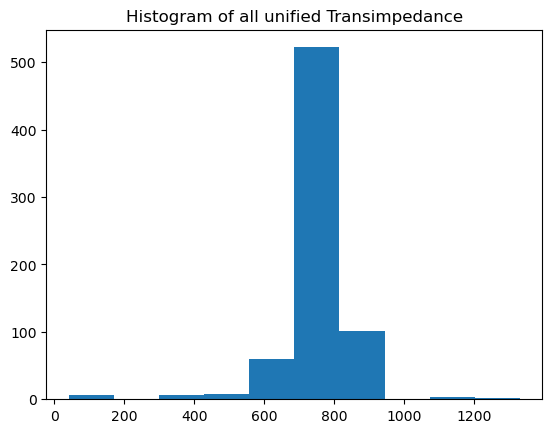

num: [  6.   0.   6.   8.  59. 522. 101.   1.   3.   2.]


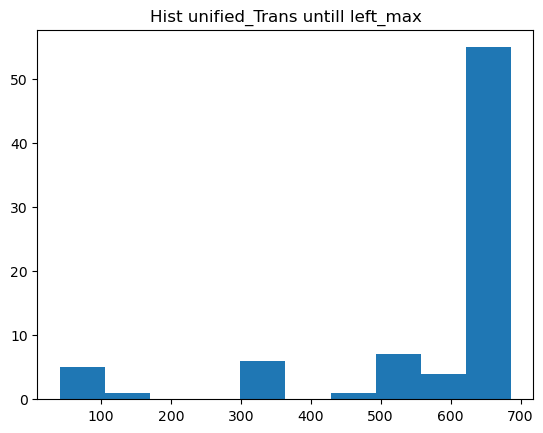

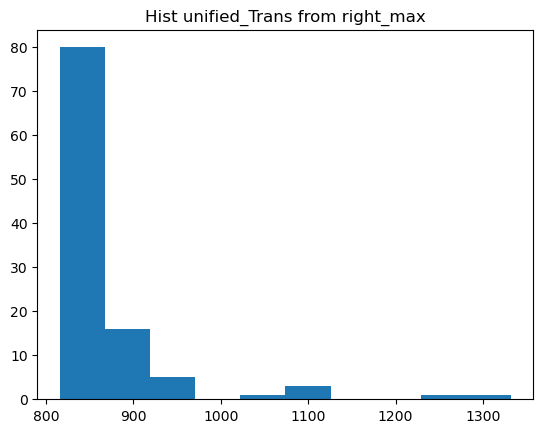

In [4]:
import numpy as np
import matplotlib.pyplot as plt

all_unifiedTrans = []

def getPString(dict):
    pstring = dict['pstring']
    return pstring

def getUnifiedTrans(dict):
    unified_Vpp = 0.005
    Trans = dict['transimpedance']
    Vpp = dict['Vpp']
    unified_Trans = unified_Vpp/Vpp*Trans
    return unified_Trans

#print(range(len(same_keys)))
# save the same psting for same key in dictionary
for i in range(len(same_keys)): #limit 5 figures
    
    key = list(same_keys)[i]
    
    pstring_20230911_222403 = getPString(dict_20230911_222403[key])
    pstring_20230919_212918 = getPString(dict_20230919_212918[key])
    pstring_20230919_221550 = getPString(dict_20230919_221550[key])
    pstring_20230919_234736 = getPString(dict_20230919_234736[key])
    pstring_20230920_014329 = getPString(dict_20230920_014329[key])
    pstring_20230920_031303 = getPString(dict_20230920_031303[key])
    
    if not (pstring_20230911_222403 == pstring_20230919_212918 == pstring_20230919_221550 \
    == pstring_20230919_234736 == pstring_20230920_014329 == pstring_20230920_031303):
        
        print(f"pstring {i} is not the same for key: {key}")

    unifiedTrans_20230911_222403 = getUnifiedTrans(dict_20230911_222403[key])
    unifiedTrans_20230919_212918 = getUnifiedTrans(dict_20230919_212918[key])
    unifiedTrans_20230919_221550 = getUnifiedTrans(dict_20230919_221550[key])
    unifiedTrans_20230919_234736 = getUnifiedTrans(dict_20230919_234736[key])
    unifiedTrans_20230920_014329 = getUnifiedTrans(dict_20230920_014329[key])
    unifiedTrans_20230920_031303 = getUnifiedTrans(dict_20230920_031303[key])
    
    all_unifiedTrans.append(unifiedTrans_20230911_222403)
    all_unifiedTrans.append(unifiedTrans_20230919_212918)
    all_unifiedTrans.append(unifiedTrans_20230919_221550)
    all_unifiedTrans.append(unifiedTrans_20230919_234736)
    all_unifiedTrans.append(unifiedTrans_20230920_014329)
    all_unifiedTrans.append(unifiedTrans_20230920_031303)


    # all_unifiedTrans = [unifiedTrans_20230911_222403, 
    #                     unifiedTrans_20230919_212918, 
    #                     unifiedTrans_20230919_221550, 
    #                     unifiedTrans_20230919_234736, 
    #                     unifiedTrans_20230920_014329, 
    #                     unifiedTrans_20230920_031303]
    
    
num, bins, patches = plt.hist(all_unifiedTrans, bins=10)
plt.title("Histogram of all unified Transimpedance")
plt.show()

print(f"num: {num}")

#print(np.unique(all_unifiedTrans))

index_max = np.argmax(num)
left_max = bins[index_max]
right_max = bins[index_max + 1]

unifiedTrans_2_left_max = []
unifiedTrans_2_right_max = []

for i in all_unifiedTrans:
    if i < left_max:
        unifiedTrans_2_left_max.append(i)
    elif i > right_max:
        unifiedTrans_2_right_max.append(i)



plt.hist(unifiedTrans_2_left_max, bins=10)
plt.title("Hist unified_Trans untill left_max")
plt.show()

plt.hist(unifiedTrans_2_right_max, bins=10)
plt.title("Hist unified_Trans from right_max")
plt.show()


In [5]:
#get all data file from the directory

import os
import glob

# Specify the directory path
folder_path = './'

# Use glob to list all .pkl files in the directory
pkl_files = glob.glob(os.path.join(folder_path, '*.pkl'))

# Filter files that are larger than 10KB (10 * 1024 bytes)
files_above_10kb = [file for file in pkl_files if os.path.getsize(file) > 10 * 1024]


In [6]:
#a empty dictionary to store diff pkl files
data = {}

for i in range(len(files_above_10kb)):
    data[f'file_{i}'] = getDict(files_above_10kb[i])

#print(data)

{'file_0': 
    {'SA13_070.1': 
        {'pstring': '017/2/1/1', 'transimpedance': 805.2293316493415, 'Vpp': 0.0051620676206559305, 'Ref_Vpp': 0.0, 'output_impedance': 787.4185861046597, 'current_bias': 0.8823173367920448
        }, 
    'SA13_070.2': 
        {'pstring': '017/2/1/2', 'transimpedance': 711.7605021698007, 'Vpp': 0.00510580
        ...
        }
    ...    
    }
...
}

In [7]:
#find all same SQUID keys in all dictionaries

SQUID = [set(d.keys()) for d in data.values()]

same_SQUID = set.intersection(*SQUID)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

all_unifiedTrans = []

def getPString(dict):
    pstring = dict['pstring']
    return pstring

def getUnifiedTrans(dict):
    unified_Vpp = 0.005
    Trans = dict['transimpedance']
    Vpp = dict['Vpp']
    unified_Trans = unified_Vpp/Vpp*Trans
    return unified_Trans


In [9]:
for i in data.keys():
    for j in same_SQUID:
        pstring = getPString(data[i][j])
        unifiedTrans = getUnifiedTrans(data[i][j])
        all_unifiedTrans.append(unifiedTrans)



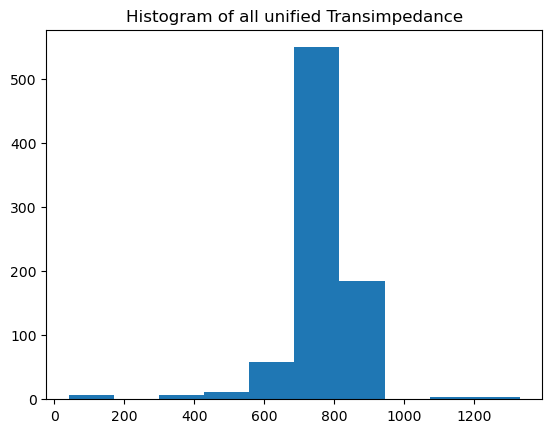

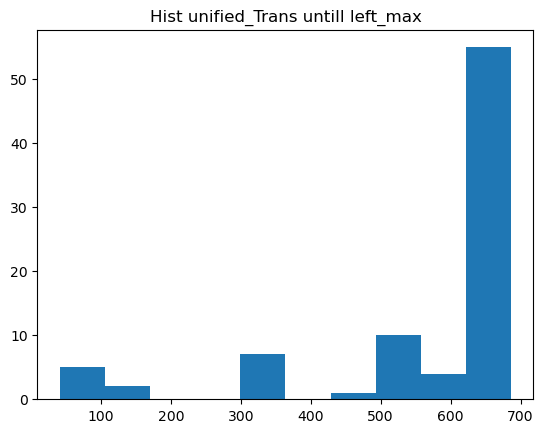

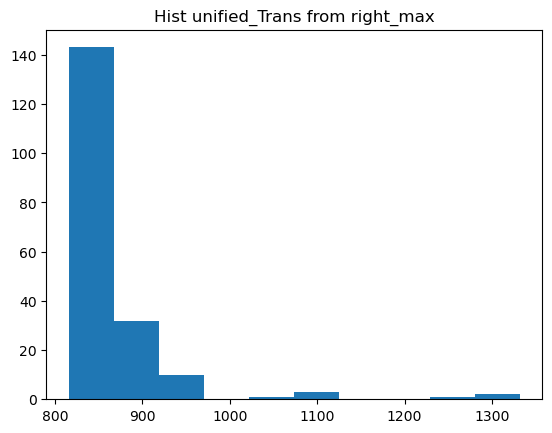

In [10]:
num, bins, patches = plt.hist(all_unifiedTrans, bins=10)
plt.title("Histogram of all unified Transimpedance")
plt.show()

#print(np.unique(all_unifiedTrans))

index_max = np.argmax(num)
left_max = bins[index_max]
right_max = bins[index_max + 1]

unifiedTrans_2_left_max = []
unifiedTrans_2_right_max = []

for i in all_unifiedTrans:
    if i < left_max:
        unifiedTrans_2_left_max.append(i)
    elif i > right_max:
        unifiedTrans_2_right_max.append(i)



plt.hist(unifiedTrans_2_left_max, bins=10)
plt.title("Hist unified_Trans untill left_max")
plt.show()

plt.hist(unifiedTrans_2_right_max, bins=10)
plt.title("Hist unified_Trans from right_max")
plt.show()